In [3]:
#importar librerias
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
from docplex.mp.model import Model;

In [4]:
#Crear datos
N=20;
np.random.seed(1);
x=list(np.random.random(N)*100);
y=list(np.random.random(N)*100);
demanda=list(np.random.randint(low=10,high=50,size=N));

In [6]:
#Definicion de conjuntos
nodos=[i for i in range(N)];
ubicaciones=[i for i in nodos]; #{}: significa creación de un diccionario, fundamental para crear la variables binarias
#Matriz de arcos
arcos=[(i,j) for i in nodos for j in ubicaciones]; #{}: significa creación de un diccionario, fundamental para crear las variables binarias
#Maximo numero de ubicaciones
p=5; 
#Matriz de distancias
distancia={(i,j):np.hypot(x[i]-x[j],y[i]-y[j]) for i in nodos for j in ubicaciones} 
#Demanda Total
demanda_max=sum(demanda)
#Creación de diccionario del peso relativo (porcentaje) de la demanda de cada nodo (w)
w={(i):demanda[i]/demanda_max for i in nodos}
ubicaciones

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [8]:
#Creacion de variable que contenga el Modelo
modelo=Model("P-CenterProblem")

In [5]:
#Creacion de variables
X=modelo.binary_var_dict(arcos,name="X") 
Y=modelo.binary_var_dict(ubicaciones,name="Y")
Z=modelo.continuous_var(name="Z")

In [6]:
#Creacion de función objetivo
obj=Z
#Instrucción de optimización
modelo.minimize(obj)

In [7]:
#Creación de restricciones
modelo.add_constraints(modelo.sum(distancia[i,j]*X[i,j]*w[i] for i in nodos)<=Z for j in ubicaciones) #Restriccion fundamental para minimizar el objetivo
modelo.add_constraints(modelo.sum(X[i,j] for j in ubicaciones)==1 for i in nodos) #Se agrega restricción para cada nodo ya que la indicacion es constraints
modelo.add_constraint(modelo.sum(Y[j] for j in ubicaciones)<=p) #Equivale a una sola restricción
M=len(ubicaciones)
modelo.add_constraints(modelo.sum(X[i,j] for i in nodos)-M*Y[j] <=0 for j in ubicaciones)
sol=modelo.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
Found incumbent of value 40.448117 after 0.00 sec. (0.04 ticks)
Tried aggregator 1 time.
Reduced MIP has 61 rows, 421 columns, and 1240 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (0.80 ticks)
Probing time = 0.02 sec. (0.99 ticks)
Tried aggregator 1 time.
Reduced MIP has 61 rows, 421 columns, and 1240 nonzeros.
Reduced MIP has 420 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (0.97 ticks)
Probing time = 0.00 sec. (0.99 ticks)
Clique table members: 420.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 4 threads.
Root relaxation solution time = 0.02 sec. (0.63 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                           40.4481        0.0000         

In [8]:
#Verificacion de optimalidad del modelo
modelo.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [9]:
#Visualización de solución
sol.display()

solution for: P-CenterProblem
Z: 2.779
X_0_4 = 1
X_1_11 = 1
X_2_14 = 1
X_3_16 = 1
X_4_4 = 1
X_5_4 = 1
X_6_14 = 1
X_7_7 = 1
X_8_7 = 1
X_9_16 = 1
X_10_7 = 1
X_11_11 = 1
X_12_4 = 1
X_13_11 = 1
X_14_14 = 1
X_15_11 = 1
X_16_16 = 1
X_17_16 = 1
X_18_7 = 1
X_19_4 = 1
Y_4 = 1
Y_7 = 1
Y_11 = 1
Y_14 = 1
Y_16 = 1
Z = 2.779


In [10]:
#Creación de lista con arcos seleccionados
arcos_activos=[k for k in arcos if X[k].solution_value>0.99]
print(arcos_activos)

[(0, 4), (1, 11), (2, 14), (3, 16), (4, 4), (5, 4), (6, 14), (7, 7), (8, 7), (9, 16), (10, 7), (11, 11), (12, 4), (13, 11), (14, 14), (15, 11), (16, 16), (17, 16), (18, 7), (19, 4)]


In [11]:
#Creación de lista con ubicaciones seleccionadas
ubicaciones_activas=[k for k in ubicaciones if Y[k].solution_value>0.99]
print(ubicaciones_activas)

[4, 7, 11, 14, 16]


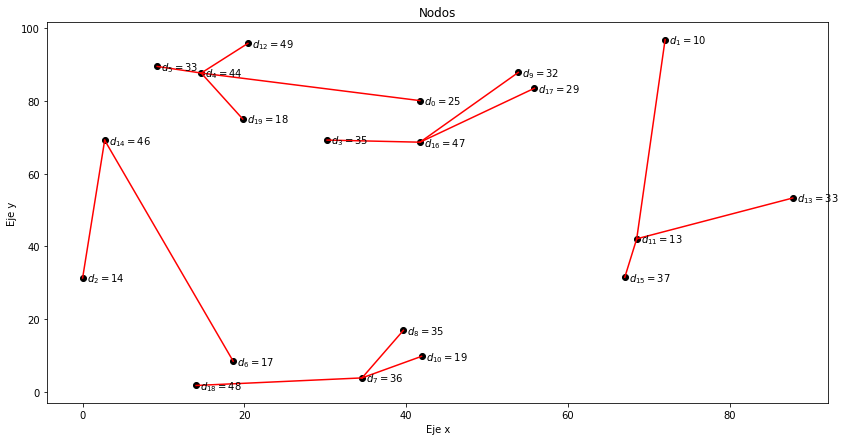

In [12]:
#Creación Gráfico
plt.figure(figsize=(14,7));
plt.scatter(x,y,color="black");

#Codigo que permite anotar etiquetas a los puntos gráficados (nodos)
for i in range(len(x)):
    plt.annotate("$d_{%d}=%d$"%(i,demanda[i]),(x[i]+0.5,y[i]-1),size=10);
    
#Codigo que permite graficar las lineas de conexión entre los nodos y las ubicaciones seleccionadas para su abastecimiento
for n in arcos_activos:
    i=n[0]
    j=n[1]
    plt.plot([x[i],x[j]],[y[i],y[j]],color="red")
#Codigos para indicar nombre a los ejes y título del gráfico
plt.xlabel("Eje x");
plt.ylabel("Eje y");
plt.title("Nodos");
plt.show();